# ANALYSIS_9 - Logistic-Regression
### Modell preparation - Logistic Regression model construction

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv(r"C:\Users\user\Desktop\PROMETHEUS\2024_PROJECT - D36 - DATA-SCIENCE-VERSENY\3_3. - TELEPROMPTER\PY_10_PYClean_Source_V11\convert_input.csv")

In [4]:
df.head()

,event_count,unique_days_active,converted
0,3,2,0
1,4,2,0
2,2,2,0
3,2,2,1
4,6,5,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33963 entries, 0 to 33962
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   event_count         33963 non-null  int64
 1   unique_days_active  33963 non-null  int64
 2   converted           33963 non-null  int64
dtypes: int64(3)
memory usage: 796.1 KB


In [12]:
df.describe()

,event_count,unique_days_active,converted
count,33963.00000,33963.000000,33963.000000
mean,3.00053,2.297500,0.132144
std,7.56135,1.589673,0.338652
min,1.00000,1.000000,0.000000
25%,1.00000,1.000000,0.000000
50%,3.00000,2.000000,0.000000
75%,3.00000,3.000000,0.000000
max,586.00000,17.000000,1.000000


In [13]:
df['converted'].value_counts()

0    29475
1     4488
Name: converted, dtype: int64

<AxesSubplot:xlabel='converted', ylabel='count'>

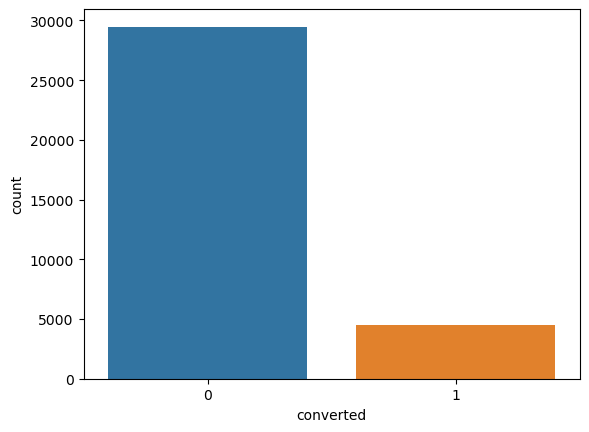

In [14]:
sns.countplot(data=df,x='converted')

<AxesSubplot:xlabel='converted', ylabel='unique_days_active'>

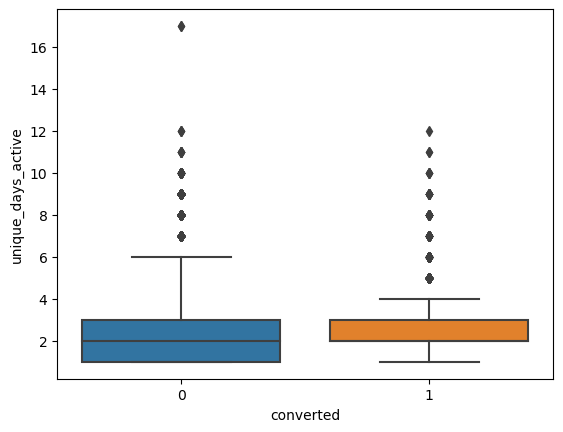

In [15]:
sns.boxplot(x='converted',y='unique_days_active',data=df)

<AxesSubplot:xlabel='event_count', ylabel='unique_days_active'>

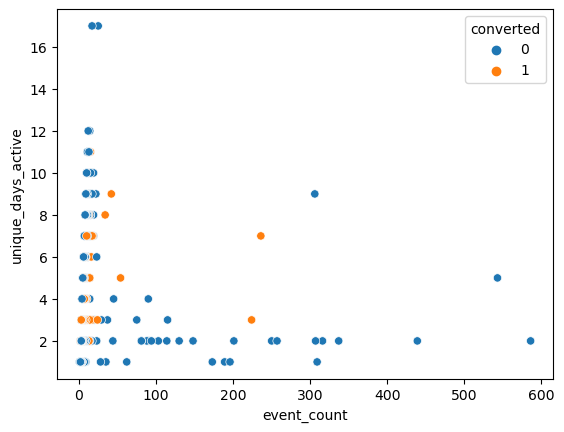

In [16]:
sns.scatterplot(x='event_count',y='unique_days_active',data=df,hue='converted')

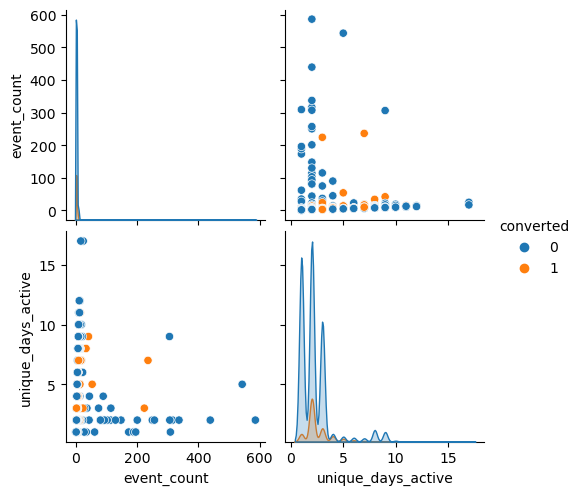

In [17]:
sns.pairplot(df,hue='converted')

<AxesSubplot:>

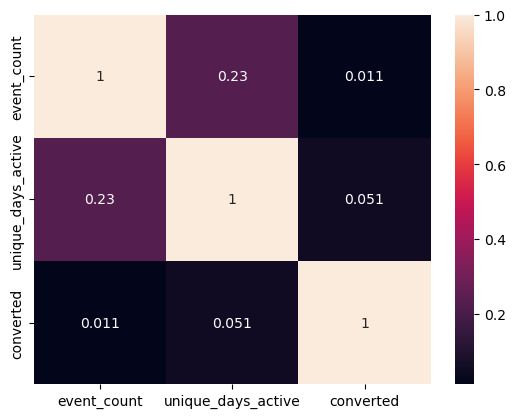

In [18]:
sns.heatmap(df.corr(),annot=True)

<AxesSubplot:xlabel='unique_days_active', ylabel='converted'>

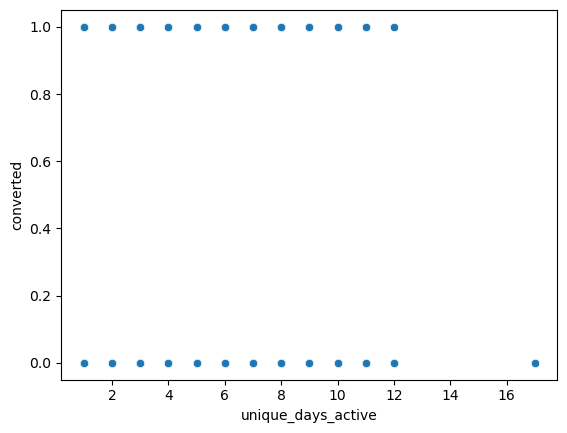

In [19]:
sns.scatterplot(x='unique_days_active',y='converted',data=df)

<AxesSubplot:xlabel='event_count', ylabel='converted'>

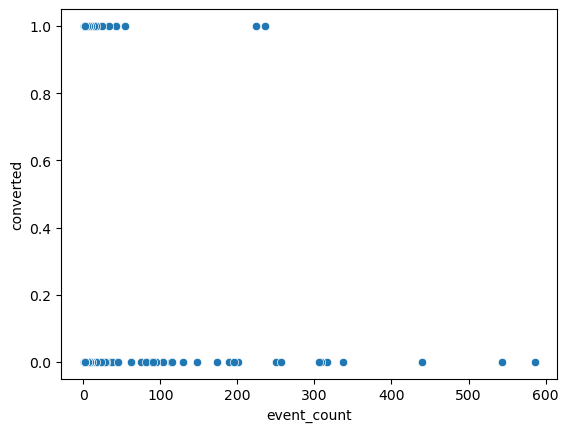

In [20]:
sns.scatterplot(x='event_count',y='converted',data=df)

### Train | Test Split and Scaling

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [14]:
# 1. Separation of input
X = df.drop('converted', axis=1)
y = df['converted']

In [15]:
# 2. Train-test split with STRATIFY option
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=101, stratify=y)

In [16]:
# 3. Standardization
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [17]:
# 4. Logistic regression with BALANCED class weight
log_model = LogisticRegression(class_weight='balanced', random_state=101)
log_model.fit(scaled_X_train, y_train)

LogisticRegression(class_weight='balanced', random_state=101)

In [18]:
# 5. Prediction
y_pred = log_model.predict(scaled_X_test)

### Model Performance & Classification Tasks

In [22]:
# 6. Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.6429202237268178
Confusion Matrix:
 [[2032  916]
 [ 297  152]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.69      0.77      2948
           1       0.14      0.34      0.20       449

    accuracy                           0.64      3397
   macro avg       0.51      0.51      0.49      3397
weighted avg       0.78      0.64      0.69      3397



In [20]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

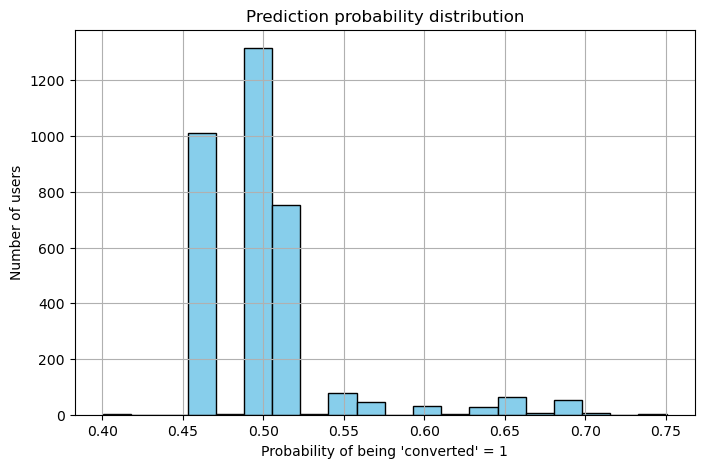

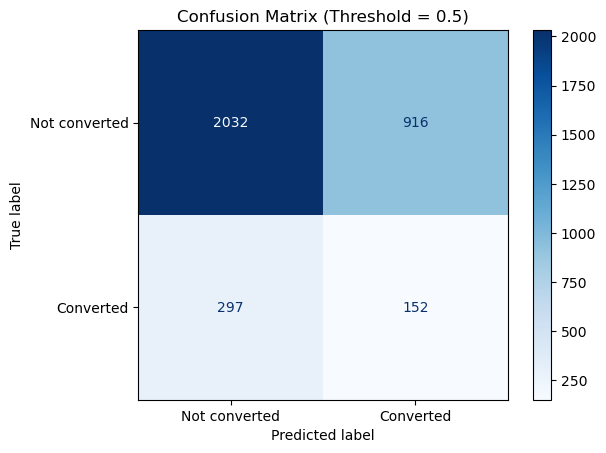

In [23]:
# 1. Retrieve predicted probabilities
y_probs = log_model.predict_proba(scaled_X_test)[:, 1]

# 2. Plotting a histogram
plt.figure(figsize=(8, 5))
plt.hist(y_probs, bins=20, color='skyblue', edgecolor='black')
plt.xlabel("Probability of being 'converted' = 1")
plt.ylabel("Number of users")
plt.title("Prediction probability distribution")
plt.grid(True)
plt.show()

# 3. Threshold choosing – e.g. 0.3
threshold = 0.5
custom_preds = (y_probs >= threshold).astype(int)

# 4. Calculation of confusion matrix
cm = confusion_matrix(y_test, custom_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not converted", "Converted"])
disp.plot(cmap='Blues')
plt.title(f'Confusion Matrix (Threshold = {threshold})')
plt.show()

### Evaluating Curves and AUC

In [9]:
from sklearn.metrics import precision_recall_curve,plot_precision_recall_curve,plot_roc_curve

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


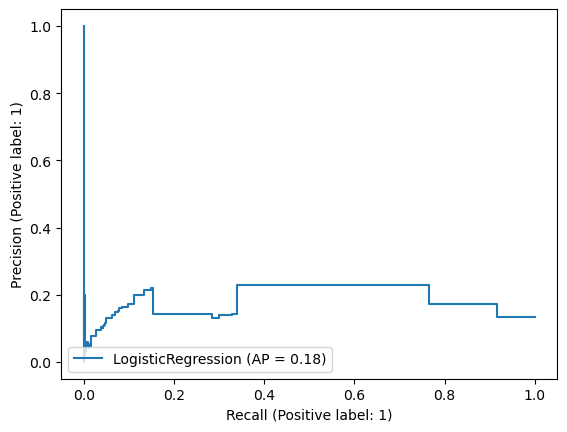

In [11]:
plot_precision_recall_curve(log_model,scaled_X_test,y_test)

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


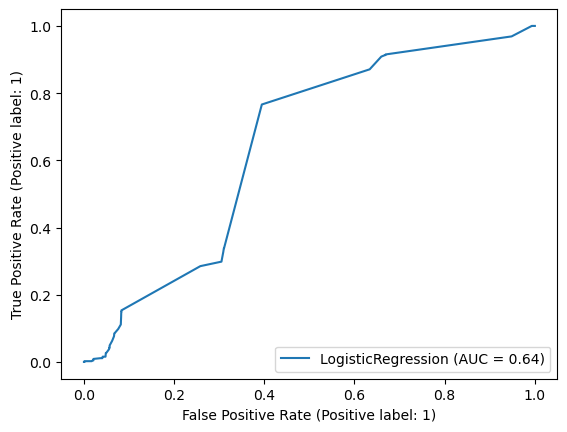

In [10]:
plot_roc_curve(log_model,scaled_X_test,y_test)

Threshold: 0.5
Accuracy: 0.6429202237268178
Confusion Matrix:
[[2032  916]
 [ 297  152]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.69      0.77      2948
           1       0.14      0.34      0.20       449

    accuracy                           0.64      3397
   macro avg       0.51      0.51      0.49      3397
weighted avg       0.78      0.64      0.69      3397



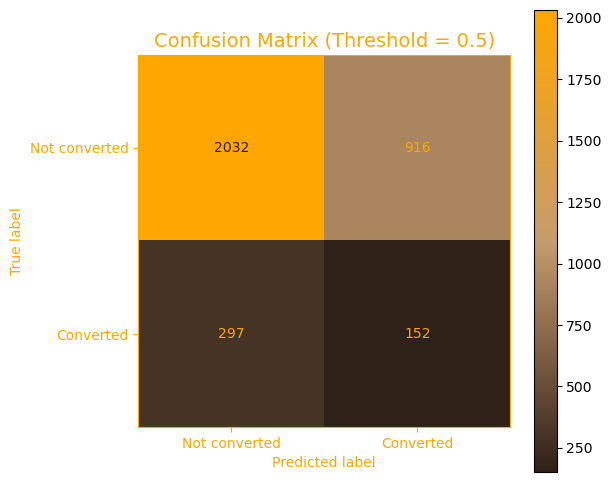

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
)

# 1. Data preparation
X = df.drop('converted', axis=1)
y = df['converted']

# 2. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=101, stratify=y
)

# 3. Scaling
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

# 4. Logistic regression with balanced class weights
log_model = LogisticRegression(class_weight='balanced', random_state=101)
log_model.fit(scaled_X_train, y_train)

# 5. Prediction based on Threshold
threshold = 0.5  
y_probs = log_model.predict_proba(scaled_X_test)[:, 1]
custom_preds = (y_probs >= threshold).astype(int)

# 6. Evaluation
print(f"Threshold: {threshold}")
print("Accuracy:", accuracy_score(y_test, custom_preds))

cm = confusion_matrix(y_test, custom_preds)
print("Confusion Matrix:")
print(cm)

print("\nClassification Report:")
print(classification_report(y_test, custom_preds))

# 7. Coloring according to the data provider's brand
colors = ["#2f2118", "#c69c6d", "#ffa600"]
custom_cmap = LinearSegmentedColormap.from_list("okker_brown", colors)

# 8. The new Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not converted", "Converted"])
fig, ax = plt.subplots(figsize=(6, 6))
disp.plot(cmap=custom_cmap, ax=ax, colorbar=True)

plt.title(f'Confusion Matrix (Threshold = {threshold})', color='#ffa600', fontsize=14)
ax.set_xlabel("Predicted label", color='#ffa600')
ax.set_ylabel("True label", color='#ffa600')
ax.tick_params(colors='#ffa600')
for spine in ax.spines.values():
    spine.set_edgecolor('#ffa600')

plt.show()

### F1-score precision-recall

In [25]:
# Threshold evaluating
from sklearn.metrics import f1_score

best_threshold = 0
best_f1 = 0

# Predicted probabilities
y_probs = log_model.predict_proba(scaled_X_test)[:, 1]

# Test at multiple thresholds (between 0.1 and 0.9)
for threshold in np.arange(0.1, 0.91, 0.05):
    custom_preds = (y_probs >= threshold).astype(int)
    score = f1_score(y_test, custom_preds)
    
    print(f"Threshold: {threshold:.2f} -> F1-score: {score:.4f}")
    
    if score > best_f1:
        best_f1 = score
        best_threshold = threshold

print(f"\n✅ Best F1-score: {best_f1:.4f} Threshold: {best_threshold:.2f}")


Threshold: 0.10 -> F1-score: 0.2335
Threshold: 0.15 -> F1-score: 0.2335
Threshold: 0.20 -> F1-score: 0.2335
Threshold: 0.25 -> F1-score: 0.2335
Threshold: 0.30 -> F1-score: 0.2335
Threshold: 0.35 -> F1-score: 0.2335
Threshold: 0.40 -> F1-score: 0.2335
Threshold: 0.45 -> F1-score: 0.2336
Threshold: 0.50 -> F1-score: 0.2004
Threshold: 0.55 -> F1-score: 0.1108
Threshold: 0.60 -> F1-score: 0.0658
Threshold: 0.65 -> F1-score: 0.0242
Threshold: 0.70 -> F1-score: 0.0044
Threshold: 0.75 -> F1-score: 0.0000
Threshold: 0.80 -> F1-score: 0.0000
Threshold: 0.85 -> F1-score: 0.0000
Threshold: 0.90 -> F1-score: 0.0000

✅ Best F1-score: 0.2336 Threshold: 0.45


### Automated threshold selection with for-loop

Threshold tests (F1-score):
  Threshold = 0.10 → F1-score = 0.2335
  Threshold = 0.15 → F1-score = 0.2335
  Threshold = 0.20 → F1-score = 0.2335
  Threshold = 0.25 → F1-score = 0.2335
  Threshold = 0.30 → F1-score = 0.2335
  Threshold = 0.35 → F1-score = 0.2335
  Threshold = 0.40 → F1-score = 0.2335
  Threshold = 0.45 → F1-score = 0.2336
  Threshold = 0.50 → F1-score = 0.2004
  Threshold = 0.55 → F1-score = 0.1108
  Threshold = 0.60 → F1-score = 0.0658
  Threshold = 0.65 → F1-score = 0.0242
  Threshold = 0.70 → F1-score = 0.0044
  Threshold = 0.75 → F1-score = 0.0000
  Threshold = 0.80 → F1-score = 0.0000
  Threshold = 0.85 → F1-score = 0.0000
  Threshold = 0.90 → F1-score = 0.0000

✅ Best threshold: 0.45
🏆 F1-score with: 0.2336

=== Classification Report ===
              precision    recall  f1-score   support

           0       1.00      0.00      0.00      2948
           1       0.13      1.00      0.23       449

    accuracy                           0.13      3397
   macro avg

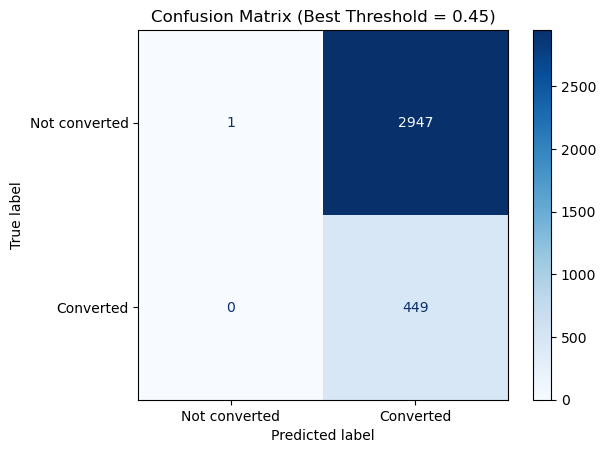

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# 1. Predicted probabilities
y_probs = log_model.predict_proba(scaled_X_test)[:, 1]

# 2. Storage for the best value
best_threshold = 0
best_f1 = 0
best_preds = None

# 3. Throughout several thresholds
print("Threshold tests (F1-score):")
for threshold in np.arange(0.1, 0.91, 0.05):
    preds = (y_probs >= threshold).astype(int)
    score = f1_score(y_test, preds)
    print(f"  Threshold = {threshold:.2f} → F1-score = {score:.4f}")
    
    if score > best_f1:
        best_f1 = score
        best_threshold = threshold
        best_preds = preds

# 4. Best threshold output
print(f"\n✅ Best threshold: {best_threshold:.2f}")
print(f"🏆 F1-score with: {best_f1:.4f}\n")

# 5. Classification report
print("=== Classification Report ===")
print(classification_report(y_test, best_preds))

# 6. Confusion matrix
cm = confusion_matrix(y_test, best_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not converted", "Converted"])
disp.plot(cmap="Blues")
plt.title(f"Confusion Matrix (Best Threshold = {best_threshold:.2f})")
plt.show()


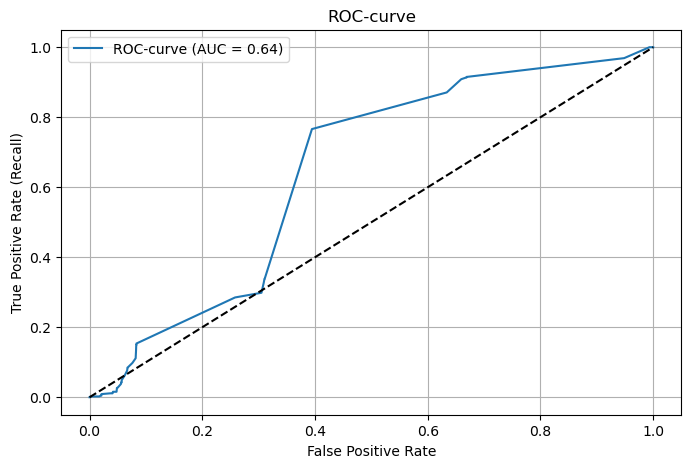

In [28]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, label=f'ROC-curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC-curve')
plt.legend()
plt.grid(True)
plt.show()


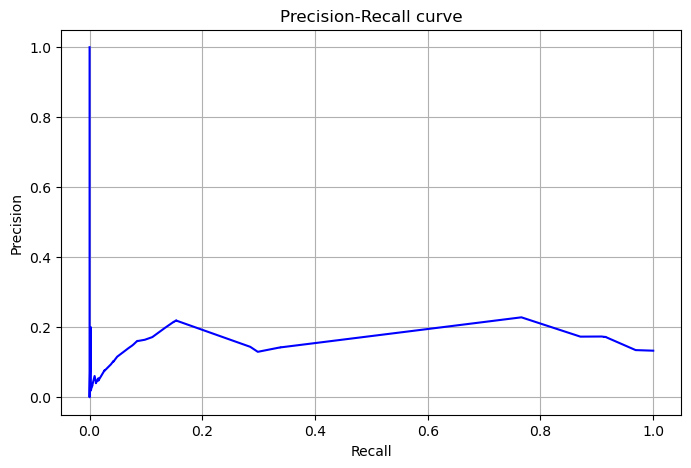

In [29]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, y_probs)

plt.figure(figsize=(8, 5))
plt.plot(recall, precision, color='blue')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.grid(True)
plt.show()
